In [29]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import re 
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score





# Importing Data

In [30]:
df = pd.read_csv("spam.csv", encoding="latin-1")
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.columns = ['Label', 'SMS']
df['Label'] = df['Label'].map({'ham':0, 'spam':1})
df = df[['SMS', 'Label']]
df['len'] = df['SMS'].apply(len)
df.head()

,SMS,Label,len
0,"Go until jurong point, crazy.. Available only ...",0,111
1,Ok lar... Joking wif u oni...,0,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,U dun say so early hor... U c already then say...,0,49
4,"Nah I don't think he goes to usf, he lives aro...",0,61


# Data Visualization

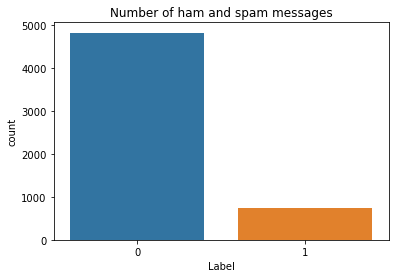

In [31]:
sns.countplot(df['Label'])
plt.xlabel('Label')
plt.title('Number of ham and spam messages')
plt.show()

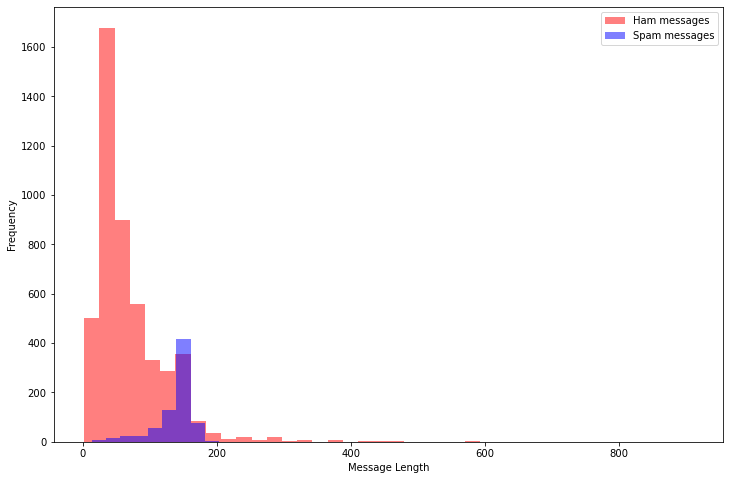

In [32]:
plt.figure(figsize=(12,8))
df.loc[df['Label']==0, 'len'].plot(bins=40, kind='hist', color='red',label='Ham messages',alpha=0.5)
df.loc[df['Label']==1, 'len'].plot(kind='hist', color='blue',label='Spam messages',alpha=0.5)
plt.legend()
plt.xlabel('Message Length')
plt.show()

## Word Clouds 

In [33]:
import wordcloud
from nltk.corpus import stopwords
data_ham  = df[df['Label'] == 0].copy()
data_spam = df[df['Label'] == 1].copy()

def show_wordcloud(data_spam_or_ham, title):
    text = ' '.join(data_spam_or_ham['SMS'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

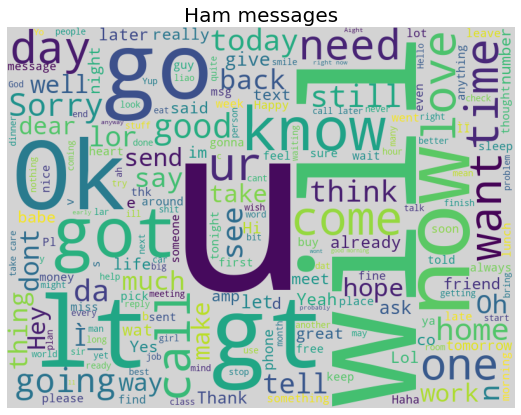

In [34]:
show_wordcloud(data_ham, "Ham messages")


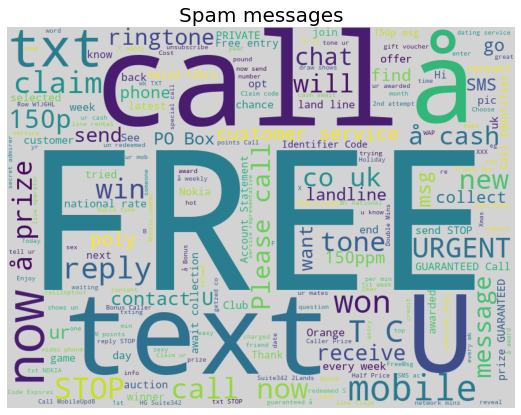

In [35]:
show_wordcloud(data_spam, "Spam messages")


In [36]:
X = df['SMS'].values
y = df['Label'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


## Model-1 : Naive Bayes

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

#X_train[:,X_train.sum(axis=0)>1]
cv = CountVectorizer(max_features=3700) #feature that accure more than one time

X_train = cv.fit_transform(X_train).toarray()
X_test = cv.transform(X_test).toarray()

clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[945   4]
 [ 13 153]]
0.9847533632286996
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       949
           1       0.97      0.92      0.95       166

    accuracy                           0.98      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.98      0.98      0.98      1115



## Model-2 : Artificial Neural Network(ANN)

In [38]:
import tensorflow as tf

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))     # Hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))     # Hidden layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))  # Output layer
ann.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy']) #Compiling
ann.fit(X_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
140/140 [==============================] - 0s 3ms/step - loss: 0.4593 - accuracy: 0.9087
Epoch 2/10
140/140 [==============================] - 0s 3ms/step - loss: 0.1416 - accuracy: 0.9803
Epoch 3/10
140/140 [==============================] - 0s 3ms/step - loss: 0.0667 - accuracy: 0.9883
Epoch 4/10
140/140 [==============================] - 0s 3ms/step - loss: 0.0398 - accuracy: 0.9921
Epoch 5/10
140/140 [==============================] - 0s 3ms/step - loss: 0.0251 - accuracy: 0.9955
Epoch 6/10
140/140 [==============================] - 0s 3ms/step - loss: 0.0166 - accuracy: 0.9971
Epoch 7/10
140/140 [==============================] - 0s 3ms/step - loss: 0.0114 - accuracy: 0.9980
Epoch 8/10
140/140 [==============================] - 0s 3ms/step - loss: 0.0082 - accuracy: 0.9993
Epoch 9/10
140/140 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 0.9998
Epoch 10/10
140/140 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 0.9998

In [39]:
y_pred = (ann.predict(X_test) > 0.5)

cm = confusion_matrix(y_test, y_pred)
print(cm,'\n')
print(accuracy_score(y_test, y_pred),'\n')
print(classification_report(y_test, y_pred))

[[947   2]
 [ 15 151]] 

0.9847533632286996 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       949
           1       0.99      0.91      0.95       166

    accuracy                           0.98      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



## Model Save 

- for futur usage, we can save the model as .pkl file

In [42]:
import joblib 
joblib.dump(clf, 'NB_Spam_Model.pkl')

['NB_Spam_Model.pkl']

## Reload Model

In [43]:
NB_Spam_Model = open('NB_Spam_Model.pkl', 'rb')
clf = joblib.load(NB_Spam_Model)